# Entregables Fernando Cabrera




## Prerrequisites

Install Spark and Java in VM

In [ ]:
# install Java8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# download spark 3.5.0
!wget -q https://apache.osuosl.org/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz

In [ ]:
ls -l # check the .tgz is there

total 391020
drwxr-xr-x  1 root root      4096 Jan 25 14:23 sample_data/
drwxr-xr-x 13 1000 1000      4096 Sep  9 02:08 spark-3.5.0-bin-hadoop3/
-rw-r--r--  1 root root 400395283 Sep  9 02:10 spark-3.5.0-bin-hadoop3.tgz


In [ ]:
# unzip it
!tar xf spark-3.5.0-bin-hadoop3.tgz

In [ ]:
!pip install -q findspark

In [ ]:

!pip install py4j

# For maps
!pip install folium
!pip install plotly

Define the environment

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"
os.environ["PYSPARK_SUBMIT_ARGS"] = "--master local[*] pyspark-shell"

Start Spark Session

---

In [ ]:
import findspark
findspark.init("spark-3.5.0-bin-hadoop3")# SPARK_HOME

from pyspark.sql import SparkSession

# create the session
spark = SparkSession \
        .builder \
        .appName("DataFrames Basics") \
        .master("local[*]") \
        .getOrCreate()

spark.version

'3.5.0'

In [ ]:
spark

In [ ]:
# For Pandas conversion optimization
spark.conf.set("spark.sql.execution.arrow.enabled", "true")

In [60]:
# Import sql functions
from pyspark.sql.functions import *

# Import matplotlib para los análisis visuales posteriores
import matplotlib.pyplot as plt


Download datasets

In [21]:
COD1_DF = spark.read.option("header", "true").option("delimiter", ",").csv("/content/COD1.csv")
COD2_DF = spark.read.option("header", "true").option("delimiter", ",").csv("/content/COD2.csv")
COD1_DF.show(3)
COD2_DF.show(3)

+---------+----+-----+-------+----------+-----+------+--------+
|     name|wins|kills|kdRatio|killstreak|level|losses|prestige|
+---------+----+-----+-------+----------+-----+------+--------+
|Player_01|   0|    0|    0.0|         0|    1|     0|       0|
|Player_02|   0|    0|    0.0|         0|    1|     0|     110|
|Player_03|   0|   66|103.125|         0|    9|     0|     110|
+---------+----+-----+-------+----------+-----+------+--------+
only showing top 3 rows

+---------+----+----------+---------+-----------+-----------+-------+------+-----+--------------+-----+------+
|     name|hits|timePlayed|headshots|averageTime|gamesPlayed|assists|misses|   xp|scorePerMinute|shots|deaths|
+---------+----+----------+---------+-----------+-----------+-------+------+-----+--------------+-----+------+
|Player_01|   0|         0|        0|        0.0|          0|      0|     0|    0|           0.0|    0|     0|
|Player_02|   0|         7|        0|        7.0|          0|      0|     0|  700| 

**ESTUDIO JUGADORES CALL OF DUTY: MULTIPLAYER**

> Bloque con sangría



Vamos a centrar nuestro análisis en el videojuego Call of Duty y en su modo de juego: multiplayer.

Disponemos de un CSV original en el que conocemos la información de los jugadores siguiente:

* name: nombre del jugador
* wins : número de victorias en todas sus partidas
* kills : número de muertes en todas sus partidas
* kdRatio : kill/deaths ratio
* killstreak : racha de muertes
* level : nivel
* losses : número total de derrotas
* prestige: modo especial que los jugadores pueden decidir si activar o no
* hits : número de veces que un jugador ha alcanzado a otro
* timePlayed : tiempo de juego en horas
* headshots : número de tiros en la cabeza
* averageTime : tiempo de juego medio
* gamesPlayed : número de partidas jugadas por jugador
* assists : asistencias
* misses : número de veces que un jugador falla un disparo
* xp : puntos de experiencia
* scorePerMinute : puntos conseguidos por minuto
* shots : número de disparos de cada jugador
* deaths : número de veces que ha muerto un jugador

Tenemos un **CSV original** con 1558 jugadores:

- Como los nombres de usuario son un poco extraños, le hemos cambiado el nombre de usuario para que cada jugador tenga el nombre Jugador_XX donde 'XX' es el número jugador. Por ejemplo, Jugador_01

**Dos archivos .csv**
- Hemos separado el CSV en dos csv independientes para poder poner en práctica lo aprendido y "jugar" con dos fuentes de datos diferentes pero la información 'name' en común.

**COD1.csv** con la siguiente información:
* name: nombre del jugador
* wins : número de victorias en todas sus partidas
* kills : número de muertes en todas sus partidas
* kdRatio : kill/deaths ratio
* killstreak : racha de muertes
* level : nivel
* losses : número total de derrotas
* prestige: modo especial que los jugadores pueden decidir si activar o no

**COD2.csv** con la siguiente información:
* name: nombre del jugador
* hits : número de veces que un jugador ha alcanzado a otro
* timePlayed : tiempo de juego en horas
* headshots : número de tiros en la cabeza
* averageTime : tiempo de juego medio
* gamesPlayed : número de partidas jugadas por jugador
* assists : asistencias
* misses : número de veces que un jugador falla un disparo
* xp : puntos de experiencia
* scorePerMinute : puntos conseguidos por minuto
* shots : número de disparos de cada jugador
* deaths : número de veces que ha muerto un jugador



El objetivo de este estudio es conocer los mejores jugadores en función de una puntuación que dependa de kills y asistencias; y además conocer la relación entre las muertes y las wins.

**Leemos los dos conseguidos del CSV original descargado de Kaggle: [COD.csv](https://www.kaggle.com/datasets/aishahakami/call-of-duty-players)**

* COD1.csv
* COD2.csv



In [23]:
COD1_DF = spark.read.option("header", "true").option("delimiter", ",").csv("/content/COD1.csv")
COD2_DF = spark.read.option("header", "true").option("delimiter", ",").csv("/content/COD2.csv")

COD1_DF.show(10)
COD2_DF.show(10)

+---------+----+-----+--------------------+----------+-----+------+--------+
|     name|wins|kills|             kdRatio|killstreak|level|losses|prestige|
+---------+----+-----+--------------------+----------+-----+------+--------+
|Player_01|   0|    0|                 0.0|         0|    1|     0|       0|
|Player_02|   0|    0|                 0.0|         0|    1|     0|     110|
|Player_03|   0|   66|             103.125|         0|    9|     0|     110|
|Player_04|   3|    2|                 0.4|         0|    1|     0|       0|
|Player_05|   0|    2|                 0.2|         0|    1|     0|     110|
|Player_06| 684|27011|10.667.430.196.27...|        18|  177|    10|     110|
|Player_07|   4|  162|           6.328.125|         4|    6|     2|       0|
|Player_08| 186| 1898|5.696.278.511.404...|        13|   37|     7|       2|
|Player_09| 741|21803|10.366.584.252.56...|        26|  185|    29|     111|
|Player_10|  26|  349|4.440.203.562.340...|         7|   12|     4|       0|

**Seleccionamos columnas relevantes de cada DF (mostramos los 10)

```
COD1: 'name', 'wins' y 'kills'
COD2: 'name', 'assists' y 'deaths'
```



In [31]:
selected_columns_cod1 = COD1_DF.select("name", "wins", "kills")
selected_columns_cod1.show(10)

selected_columns_cod2 = COD2_DF.select("name", "assists", "deaths")
selected_columns_cod2.show(10)




+---------+----+-----+
|     name|wins|kills|
+---------+----+-----+
|Player_01|   0|    0|
|Player_02|   0|    0|
|Player_03|   0|   66|
|Player_04|   3|    2|
|Player_05|   0|    2|
|Player_06| 684|27011|
|Player_07|   4|  162|
|Player_08| 186| 1898|
|Player_09| 741|21803|
|Player_10|  26|  349|
+---------+----+-----+
only showing top 10 rows

+---------+-------+------+
|     name|assists|deaths|
+---------+-------+------+
|Player_01|      0|     0|
|Player_02|      0|    16|
|Player_03|      1|    64|
|Player_04|      0|     5|
|Player_05|      0|    10|
|Player_06|   6063| 25321|
|Player_07|     68|   256|
|Player_08|    488|  3332|
|Player_09|   4029| 21032|
|Player_10|    138|   786|
+---------+-------+------+
only showing top 10 rows



Asumiendo que la puntuación total de un jugador depende de las kills y las assists, creamos un nuevo DF con cada usuario y una nueva columna 'total_score' que sea la suma de ambas.




In [36]:
# Seleccionar las columnas relevantes de COD1 y COD2
selected_columns_cod1 = COD1_DF.select("name", "kills")
selected_columns_cod2 = COD2_DF.select("name", "assists")

# Realizar un inner join en la columna 'name' para combinar la información
total_score_df = selected_columns_cod1.join(selected_columns_cod2, "name")

# Calcular la nueva columna 'total_score' como la suma de 'kills' y 'assists'
total_score_df = total_score_df.withColumn("total_score", col("kills") + col("assists"))

# Mostrar el DataFrame resultante
total_score_df.show(10)


+---------+-----+-------+-----------+
|     name|kills|assists|total_score|
+---------+-----+-------+-----------+
|Player_01|    0|      0|        0.0|
|Player_02|    0|      0|        0.0|
|Player_03|   66|      1|       67.0|
|Player_04|    2|      0|        2.0|
|Player_05|    2|      0|        2.0|
|Player_06|27011|   6063|    33074.0|
|Player_07|  162|     68|      230.0|
|Player_08| 1898|    488|     2386.0|
|Player_09|21803|   4029|    25832.0|
|Player_10|  349|    138|      487.0|
+---------+-----+-------+-----------+
only showing top 10 rows



Ordenamos por total_score

In [37]:
# Ordenar el DataFrame por 'total_score' en orden descendente
sorted_merged_df = merged_df.orderBy(col("total_score").desc())

# Mostrar el DataFrame ordenado
sorted_merged_df.show(10)

+-----------+-----+-------+-----------+
|       name|kills|assists|total_score|
+-----------+-----+-------+-----------+
|Player_1121|66935|  10441|    77376.0|
| Player_236|59563|  12300|    71863.0|
|Player_1096|55368|  14531|    69899.0|
|Player_1287|57116|   9650|    66766.0|
|Player_1314|51595|  10472|    62067.0|
|Player_1527|50302|   8242|    58544.0|
|Player_1264|50600|   7371|    57971.0|
|Player_1022|45125|   9534|    54659.0|
| Player_506|44067|   9598|    53665.0|
|Player_1552|45764|   7133|    52897.0|
+-----------+-----+-------+-----------+
only showing top 10 rows



Calculamos la media del total_score de la muestra

In [38]:
# Calcular la media de 'total_score'
average_total_score = sorted_merged_df.agg({"total_score": "avg"}).collect()[0][0]

# Mostrar la media
print(f"La media de total_score es: {average_total_score}")


La media de total_score es: 4438.799101412067


En función de la media calculada, vamos a seleccionar a todos los jugadores que tengan una puntuación mayor que la media, por ejemplo 4500 pts y mostrar el número total de usuarios

In [41]:
# Filtrar jugadores con más de 4500 puntos en 'total_score'
filtered_df = sorted_merged_df.filter(col("total_score") > 4500)

total_users = filtered_df.count()
print(f"El número total de usuarios con más de 4500 puntos es: {total_users}")
filtered_df.show()



El número total de usuarios con más de 4500 puntos es: 371
+-----------+-----+-------+-----------+
|       name|kills|assists|total_score|
+-----------+-----+-------+-----------+
|Player_1121|66935|  10441|    77376.0|
| Player_236|59563|  12300|    71863.0|
|Player_1096|55368|  14531|    69899.0|
|Player_1287|57116|   9650|    66766.0|
|Player_1314|51595|  10472|    62067.0|
|Player_1527|50302|   8242|    58544.0|
|Player_1264|50600|   7371|    57971.0|
|Player_1022|45125|   9534|    54659.0|
| Player_506|44067|   9598|    53665.0|
|Player_1552|45764|   7133|    52897.0|
|Player_1434|42762|   7550|    50312.0|
| Player_136|38924|  11229|    50153.0|
|Player_1517|39064|  10008|    49072.0|
|Player_1074|38917|   8523|    47440.0|
| Player_720|38502|   7916|    46418.0|
| Player_177|40392|   5979|    46371.0|
|Player_1058|38357|   7287|    45644.0|
| Player_187|38200|   6259|    44459.0|
| Player_994|35196|   7049|    42245.0|
| Player_624|35285|   6081|    41366.0|
+-----------+-----+--

Como tenemos más de 300 jugadores, queremos solamente el top100 de jugadores en función del total_score (kills + assists)

In [42]:
top_100_players = sorted_merged_df.limit(100)
top_100_players.show()


+-----------+-----+-------+-----------+
|       name|kills|assists|total_score|
+-----------+-----+-------+-----------+
|Player_1121|66935|  10441|    77376.0|
| Player_236|59563|  12300|    71863.0|
|Player_1096|55368|  14531|    69899.0|
|Player_1287|57116|   9650|    66766.0|
|Player_1314|51595|  10472|    62067.0|
|Player_1527|50302|   8242|    58544.0|
|Player_1264|50600|   7371|    57971.0|
|Player_1022|45125|   9534|    54659.0|
| Player_506|44067|   9598|    53665.0|
|Player_1552|45764|   7133|    52897.0|
|Player_1434|42762|   7550|    50312.0|
| Player_136|38924|  11229|    50153.0|
|Player_1517|39064|  10008|    49072.0|
|Player_1074|38917|   8523|    47440.0|
| Player_720|38502|   7916|    46418.0|
| Player_177|40392|   5979|    46371.0|
|Player_1058|38357|   7287|    45644.0|
| Player_187|38200|   6259|    44459.0|
| Player_994|35196|   7049|    42245.0|
| Player_624|35285|   6081|    41366.0|
+-----------+-----+-------+-----------+
only showing top 20 rows



A nuestro df con kills, assists y total score, vamos a añadirle: wins, level, prestige, xp, misses y deaths; para poder hacer un análisis más profundo.

In [67]:
additional_columns_cod1 = COD1_DF.select("name", "wins", "level", "prestige")

additional_columns_cod2 = COD2_DF.select("name", "xp", "misses", "deaths", "gamesPlayed")

# Hacemos un inner join
final_df = sorted_merged_df \
    .join(additional_columns_cod1, "name") \
    .join(additional_columns_cod2, "name")

final_df.show(10)


+---------+-------+-------+-----------+----+-----+--------+-------+------+------+-----------+
|     name|  kills|assists|total_score|wins|level|prestige|     xp|misses|deaths|gamesPlayed|
+---------+-------+-------+-----------+----+-----+--------+-------+------+------+-----------+
|Player_01|    0.0|    0.0|        0.0|   0|    1|       0|      0|     0|     0|          0|
|Player_02|    0.0|    0.0|        0.0|   0|    1|     110|    700|     0|    16|          0|
|Player_03|   66.0|    1.0|       67.0|   0|    9|     110|  48300|     0|    64|          0|
|Player_04|    2.0|    0.0|        2.0|   3|    1|       0|   1150|     0|     5|          0|
|Player_05|    2.0|    0.0|        2.0|   0|    1|     110|   1000|     0|    10|          0|
|Player_06|27011.0| 6063.0|    33074.0| 684|  177|     110|3932335|305319| 25321|        588|
|Player_07|  162.0|   68.0|      230.0|   4|    6|       0|  24485|  4836|   256|          4|
|Player_08| 1898.0|  488.0|     2386.0| 186|   37|       2| 

In [68]:
# Para poder análisis numéricos necesitamos convertir las columnas a tipo numérico
def convert_to_numeric_columns(df):
    numeric_columns = [col_name for col_name, col_type in df.dtypes if col_name != 'name']
    for col_name in numeric_columns:
        df = df.withColumn(col_name, col(col_name).cast('double'))  # Puedes cambiar 'double' según tus necesidades
    return df

additional_columns_cod1 = convert_to_numeric_columns(additional_columns_cod1)
additional_columns_cod2 = convert_to_numeric_columns(additional_columns_cod2)
sorted_merged_df = convert_to_numeric_columns(sorted_merged_df)

final_df = sorted_merged_df.join(additional_columns_cod1, "name").join(additional_columns_cod2, "name")

final_df.show(10)



+---------+-------+-------+-----------+-----+-----+--------+---------+--------+-------+-----------+
|     name|  kills|assists|total_score| wins|level|prestige|       xp|  misses| deaths|gamesPlayed|
+---------+-------+-------+-----------+-----+-----+--------+---------+--------+-------+-----------+
|Player_01|    0.0|    0.0|        0.0|  0.0|  1.0|     0.0|      0.0|     0.0|    0.0|        0.0|
|Player_02|    0.0|    0.0|        0.0|  0.0|  1.0|   110.0|    700.0|     0.0|   16.0|        0.0|
|Player_03|   66.0|    1.0|       67.0|  0.0|  9.0|   110.0|  48300.0|     0.0|   64.0|        0.0|
|Player_04|    2.0|    0.0|        2.0|  3.0|  1.0|     0.0|   1150.0|     0.0|    5.0|        0.0|
|Player_05|    2.0|    0.0|        2.0|  0.0|  1.0|   110.0|   1000.0|     0.0|   10.0|        0.0|
|Player_06|27011.0| 6063.0|    33074.0|684.0|177.0|   110.0|3932335.0|305319.0|25321.0|      588.0|
|Player_07|  162.0|   68.0|      230.0|  4.0|  6.0|     0.0|  24485.0|  4836.0|  256.0|        4.0|


In [69]:
# Calcular la correlación entre "wins" y "kills"
correlation_wins_kills = final_df.select(corr("wins", "kills")).collect()[0][0]

print(f"Correlación entre 'wins' y 'kills': {correlation_wins_kills}")


Correlación entre 'wins' y 'kills': 0.9002012044525194


La correlación entre wins y kills es de 0,9.
Este resultado significa que hay una relación clara de que a medida que el númer de kills aumenta, también aumenta el número de victorias.

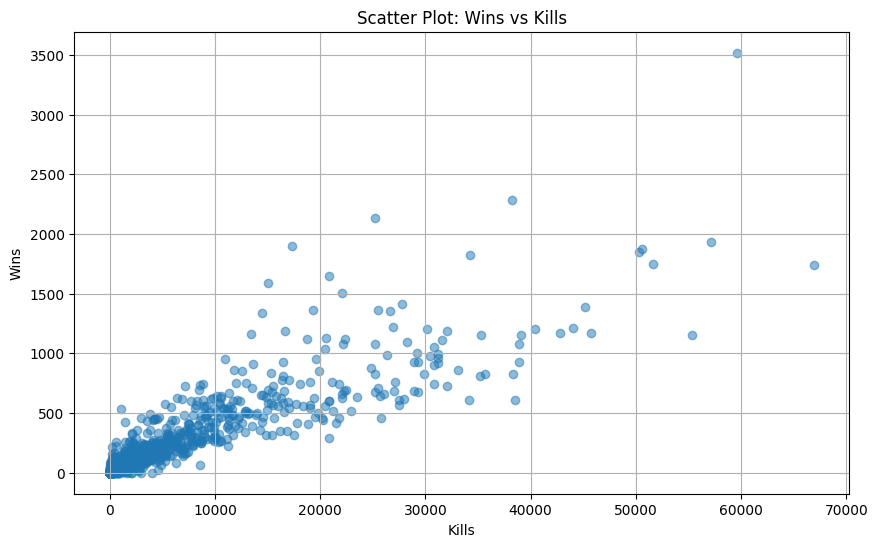

In [70]:
# Convierte el DataFrame de PySpark a un DataFrame de Pandas para visualización
pd_final_df = final_df.select("wins", "kills").toPandas()

plt.figure(figsize=(10, 6))
plt.scatter(pd_final_df['kills'], pd_final_df['wins'], alpha=0.5)
plt.title('Scatter Plot: Wins vs Kills')
plt.xlabel('Kills')
plt.ylabel('Wins')
plt.grid(True)
plt.show()
